In [1]:
%pylab inline
import pandas as pd

Populating the interactive namespace from numpy and matplotlib


In [2]:
properties=pd.read_csv('../input/properties_2016_2017.csv',dtype={"censustractandblock":np.str, 'rawcensustractandblock':np.str})

/home/bo/anaconda2/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (49) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
properties.shape

(5970434, 58)

In [4]:
properties.head()

parcelid  airconditioningtypeid  architecturalstyletypeid  basementsqft  \
0  107541476                    NaN                       NaN           NaN   
1  107595476                    NaN                       NaN           NaN   
2  108435476                    NaN                       NaN           NaN   
3  108591476                    NaN                       NaN           NaN   
4  108799476                    NaN                       NaN           NaN   

   bathroomcnt  bedroomcnt  buildingclasstypeid  buildingqualitytypeid  \
0          0.0         0.0                  NaN                    NaN   
1          0.0         0.0                  NaN                    NaN   
2          0.0         0.0                  NaN                    NaN   
3          0.0         0.0                  3.0                    7.0   
4          0.0         0.0                  4.0                    NaN   

   calculatedbathnbr  decktypeid         ...           numberofstories  \
0                NaN         NaN         ...                       NaN   
1                NaN         NaN         ...                       NaN   
2                NaN         NaN         ...                       NaN   
3                NaN         NaN         ...                       1.0   
4                NaN         NaN         ...                       NaN   

   fireplaceflag  structuretaxvaluedollarcnt  taxvaluedollarcnt  \
0            NaN                         NaN                9.0   
1            NaN                         NaN            27516.0   
2            NaN                    650756.0          1413387.0   
3            NaN                    571346.0          1156834.0   
4            NaN                    193796.0           433491.0   

   assessmentyear  landtaxvaluedollarcnt  taxamount  taxdelinquencyflag  \
0          2015.0                    9.0        NaN                 NaN   
1          2015.0                27516.0        NaN                 NaN   
2          2015.0               762631.0   20800.37                 NaN   
3          2015.0               585488.0   14557.57                 NaN   
4          2015.0               239695.0    5725.17                 NaN   

   taxdelinquencyyear  censustractandblock  
0                 NaN                  NaN  
1                 NaN                  NaN  
2                 NaN                  NaN  
3                 NaN                  NaN  
4                 NaN                  NaN  

[5 rows x 58 columns]

In [5]:
train=pd.read_csv('../input/train_2016_2017.csv')

In [6]:
train.shape

(167888, 3)

In [7]:
train.head()

parcelid  logerror transactiondate
0  110165946    0.0276      2016-01-01
1  143666926   -0.1684      2016-01-01
2  120981166   -0.0040      2016-01-01
3  126434136    0.0218      2016-01-02
4  144325416   -0.0050      2016-01-02

In [8]:
train.parcelid.value_counts().shape

(167564,)

In [9]:
trainids=(set(train.parcelid))

In [10]:
properties['intrain']=properties.parcelid.isin(trainids)

In [11]:
[u for u in zip(properties.columns,properties.dtypes) if u[1]!=np.float64]

[('parcelid', dtype('int64')),
 ('hashottuborspa', dtype('O')),
 ('propertycountylandusecode', dtype('O')),
 ('propertyzoningdesc', dtype('O')),
 ('rawcensustractandblock', dtype('O')),
 ('fireplaceflag', dtype('O')),
 ('taxdelinquencyflag', dtype('O')),
 ('censustractandblock', dtype('O')),
 ('intrain', dtype('bool'))]

In [12]:
cols=properties.columns

In [13]:
def show(col,nan_val=-100, trans=None ):
    def f(v):
        v=v[col]
        r1= v.value_counts()
        #print r
        return r1,r1/float(v.shape[0])
    
    v = properties[[col,'intrain']].copy()
    v = v.fillna(nan_val)
    print v[col].dtype

    if trans: v[col]=trans(v[col])
    cnta,a=f(v)
    cntb,b=f(v[v.intrain])
    cntc,c=f(v[~v.intrain])
    r= pd.concat([a,b,c,b/c,cnta,cntb,cntc],axis=1)
    r.columns=['total','train','non-train' ,'train/non-train','#total','#train','#non-train']
    return r
 

In [14]:
def f_combine(s,m,t=None):
    assert(t is not None)
    def f(v):
        if v in m:
            return m[v]
        else:
            return v
    return s.astype(t).apply(f)

In [15]:
show(cols[22]).dropna()

object


total     train  non-train  train/non-train   #total  #train  \
-100  0.980056  0.976719   0.980152         0.996498  5851358  163663   
True  0.019944  0.023281   0.019848         1.172951   119076    3901   

      #non-train  
-100     5687695  
True      115175

In [16]:
train_properties = properties[properties.intrain]
train_properties.shape

(167564, 59)

In [17]:
vc=train_properties[cols[32]].value_counts()
codes=set(vc[vc>100].index)
str(codes)

"set(['1128', '1129', '0400', '1111', '010V', '1', '1110', '01DC', '012C', '010H', '0200', '010E', '010D', '010G', '010M', '010C', '0300', '0108', '01HC', '0104', '0101', '0100', '0103', '122', '1117', '96', '38', '34', '0700'])"

In [18]:
def trans_propertycountylandusecode(s):
    codes=set(['1128', '1129', '0400', '1111', '010V', '1', '1110', '01DC', '012C', '010H', '0200', '010E', '010D', '010G', '010M', '010C', '0300', '0108', '01HC', '0104', '0101', '0100', '0103', '122', '1117', '96', '38', '34', '0700'])
    s=s.copy()
    s[~s.isin(codes)]="XXXX"
    return s
show(cols[32],trans=trans_propertycountylandusecode) 

object


total     train  non-train  train/non-train   #total  #train  \
0100  0.386442  0.343248   0.387690         0.885368  2307228   57516   
0101  0.083056  0.082488   0.083072         0.992964   495880   13822   
0103  0.001267  0.001140   0.001271         0.896757     7567     191   
0104  0.004694  0.004267   0.004707         0.906598    28027     715   
0108  0.000888  0.000615   0.000896         0.686352     5300     103   
010C  0.075599  0.113789   0.074496         1.527447   451360   19067   
010D  0.020357  0.024773   0.020230         1.224550   121543    4151   
010E  0.017091  0.025829   0.016838         1.533931   102039    4328   
010G  0.000866  0.001032   0.000861         1.198704     5171     173   
010H  0.000772  0.000812   0.000771         1.052466     4611     136   
010M  0.000493  0.000662   0.000489         1.355914     2946     111   
010V  0.000947  0.001432   0.000933         1.535733     5652     240   
012C  0.002797  0.005413   0.002721         1.989114    16698     907   
01DC  0.002213  0.002757   0.002197         1.254758    13213     462   
01HC  0.000968  0.001701   0.000947         1.796790     5778     285   
0200  0.034964  0.023764   0.035288         0.673437   208752    3982   
0300  0.012028  0.006308   0.012193         0.517330    71814    1057   
0400  0.011062  0.008152   0.011146         0.731425    66042    1366   
0700  0.000768  0.000621   0.000772         0.803929     4584     104   
1     0.020804  0.031671   0.020490         1.545715   124207    5307   
1110  0.012869  0.012765   0.012872         0.991702    76834    2139   
1111  0.042460  0.043172   0.042439         1.017257   253503    7234   
1117  0.000384  0.000603   0.000378         1.596398     2292     101   
1128  0.003156  0.004106   0.003128         1.312436    18842     688   
1129  0.010573  0.018023   0.010357         1.740095    63123    3020   
122   0.174907  0.169511   0.175063         0.968288  1044272   28404   
34    0.041286  0.064799   0.040607         1.595743   246498   10858   
38    0.001660  0.001194   0.001673         0.713448     9908     200   
96    0.001904  0.001152   0.001926         0.598097    11368     193   
XXXX  0.032725  0.004201   0.033549         0.125233   195382     704   

      #non-train  
0100     2249712  
0101      482058  
0103        7376  
0104       27312  
0108        5197  
010C      432293  
010D      117392  
010E       97711  
010G        4998  
010H        4475  
010M        2835  
010V        5412  
012C       15791  
01DC       12751  
01HC        5493  
0200      204770  
0300       70757  
0400       64676  
0700        4480  
1         118900  
1110       74695  
1111      246269  
1117        2191  
1128       18154  
1129       60103  
122      1015868  
34        235640  
38          9708  
96         11175  
XXXX      194678

In [19]:
show(cols[33]).dropna()

float64


total     train  non-train  train/non-train   #total    #train  \
-100.0  0.002407  0.000197   0.002471         0.079716    14369      33.0   
 31.0   0.003174  0.000191   0.003260         0.058581    18949      32.0   
 47.0   0.001456  0.000006   0.001498         0.003984     8693       1.0   
 246.0  0.038406  0.026133   0.038761         0.674219   229303    4379.0   
 247.0  0.013399  0.006935   0.013586         0.510432    79999    1162.0   
 248.0  0.013576  0.009566   0.013692         0.698691    81056    1603.0   
 260.0  0.000963  0.000591   0.000974         0.606697     5750      99.0   
 261.0  0.720421  0.673605   0.721773         0.933265  4301225  112872.0   
 263.0  0.019728  0.000937   0.020270         0.046223   117782     157.0   
 264.0  0.000078  0.000101   0.000077         1.317054      464      17.0   
 265.0  0.003156  0.004106   0.003128         1.312436    18842     688.0   
 266.0  0.161606  0.251146   0.159020         1.579334   964856   42083.0   
 267.0  0.000607  0.000340   0.000615         0.553238     3625      57.0   
 269.0  0.020606  0.025525   0.020464         1.247280   123028    4277.0   
 275.0  0.000405  0.000621   0.000399         1.555095     2420     104.0   

        #non-train  
-100.0       14336  
 31.0        18917  
 47.0         8692  
 246.0      224924  
 247.0       78837  
 248.0       79453  
 260.0        5651  
 261.0     4188353  
 263.0      117625  
 264.0         447  
 265.0       18154  
 266.0      922773  
 267.0        3568  
 269.0      118751  
 275.0        2316

In [20]:
vc=train_properties[cols[33]].value_counts()
codes=set(vc[vc>100].index)
str(codes)

'set([261.0, 263.0, 265.0, 266.0, 269.0, 275.0, 246.0, 247.0, 248.0])'

In [21]:
def trans_propertylandusetypeid(s):
    codes=set([261.0, 263.0, 265.0, 266.0, 269.0, 275.0, 246.0, 247.0, 248.0])
    s=s.copy()
    s[~s.isin(codes)]=999
    return s.astype(np.int32)
show(cols[33],trans=trans_propertylandusetypeid) 

float64


total     train  non-train  train/non-train   #total  #train  \
246  0.038406  0.026133   0.038761         0.674219   229303    4379   
247  0.013399  0.006935   0.013586         0.510432    79999    1162   
248  0.013576  0.009566   0.013692         0.698691    81056    1603   
261  0.720421  0.673605   0.721773         0.933265  4301225  112872   
263  0.019728  0.000937   0.020270         0.046223   117782     157   
265  0.003156  0.004106   0.003128         1.312436    18842     688   
266  0.161606  0.251146   0.159020         1.579334   964856   42083   
269  0.020606  0.025525   0.020464         1.247280   123028    4277   
275  0.000405  0.000621   0.000399         1.555095     2420     104   
999  0.008697  0.001426   0.008907         0.160142    51923     239   

     #non-train  
246      224924  
247       78837  
248       79453  
261     4188353  
263      117625  
265       18154  
266      922773  
269      118751  
275        2316  
999       51684

In [22]:
a = train_properties[cols[34]].apply(lambda u:str(u)[0:1]).value_counts() 
a=a[a>100]
print str(set(a.index))
a

set(['A', 'C', 'B', 'E', 'D', 'G', 'I', 'H', 'M', 'L', 'n', 'P', 'S', 'R', 'T', 'W', 'N'])


L    65236
n    59001
S     7978
P     7025
C     4034
W     3583
G     3216
B     2987
A     2595
R     2577
M     2283
T     2259
D     1246
H     1102
N     1058
E      840
I      529
Name: propertyzoningdesc, dtype: int64

In [23]:
show(cols[34]).dropna()

object


total     train     non-train  train/non-train   #total  \
-100        3.365474e-01  0.352110  3.360980e-01         1.047642  2009334   
1NR1*       9.547045e-05  0.000054  9.667630e-05         0.555574      570   
1NR3*       2.177396e-05  0.000036  2.136874e-05         1.675682      130   
AH RM-CD*   6.029712e-05  0.000078  5.979800e-05         1.297406      360   
AH RM-CD-F  2.210895e-05  0.000030  2.188572e-05         1.363416      132   
AH RS(3)10  4.354792e-06  0.000006  4.308213e-06         1.385231       26   
AH RS-(3)-  1.071949e-05  0.000018  1.051204e-05         1.703153       64   
AHA11*      4.840519e-05  0.000042  4.859664e-05         0.859629      289   
AHA110000*  4.354792e-06  0.000006  4.308213e-06         1.385231       26   
AHA21*      9.882029e-06  0.000006  9.995054e-06         0.597082       59   
AHPPD1O*    3.349840e-07  0.000006  1.723285e-07        34.630768        2   
AHPRD10*    1.674920e-06  0.000006  1.550957e-06         3.847863       10   
AHR110000*  6.264201e-05  0.000078  6.221060e-05         1.247091      374   
AHR115000*  3.014856e-06  0.000006  2.929585e-06         2.037104       18   
AHR120000*  1.976406e-05  0.000012  1.999011e-05         0.597082      118   
AHR17000*   5.892369e-04  0.000633  5.879849e-04         1.075868     3518   
AHR17000-C  2.612875e-05  0.000030  2.602161e-05         1.146714      156   
AHR17500*   9.915527e-05  0.000113  9.874424e-05         1.148315      592   
AHR26250*   1.185843e-04  0.000101  1.190790e-04         0.851987      708   
AHR3*       7.570639e-05  0.000131  7.410126e-05         1.771807      452   
AHR3-R325U  2.411885e-05  0.000036  2.378134e-05         1.505686      144   
AHR335U*    4.957764e-05  0.000107  4.790733e-05         2.242280      296   
AHRA10000*  1.708419e-05  0.000018  1.706052e-05         1.049417      102   
AHRA20000*  7.135160e-05  0.000090  7.082702e-05         1.263897      426   
AHRA20000-  1.339936e-06  0.000006  1.206300e-06         4.947253        8   
AHRA2OOOO*  3.349840e-06  0.000012  3.101913e-06         3.847863       20   
AHRH-OA-FC  6.364696e-06  0.000024  5.859170e-06         4.074208       38   
AHRPD10*    3.383339e-05  0.000072  3.274242e-05         2.187206      202   
AHRPD10000  2.937810e-04  0.000334  2.926138e-04         1.142122     1754   
AHRPD11.6U  4.053307e-05  0.000036  4.066953e-05         0.880443      242   
...                  ...       ...           ...              ...      ...   
WHR3*       1.063574e-04  0.000095  1.066714e-04         0.895141      635   
WHR3YY      1.172444e-05  0.000006  1.189067e-05         0.501895       70   
WHR4*       3.994684e-04  0.000465  3.975619e-04         1.170871     2385   
WHR4UD*     8.039617e-06  0.000012  7.927112e-06         1.505686       48   
WHRAYY      2.344888e-06  0.000006  2.240271e-06         2.663905       14   
WHRE*       7.302652e-05  0.000107  7.203332e-05         1.491277      436   
WHRE15000(  1.306438e-05  0.000018  1.292464e-05         1.385231       78   
WHRE20000*  2.107050e-04  0.000209  2.107578e-04         0.991069     1258   
WHRZ*       1.004952e-06  0.000006  8.616426e-07         6.926154        6   
WNR110000*  3.349840e-07  0.000006  1.723285e-07        34.630768        2   
WV RPD56*   4.354792e-06  0.000012  4.135884e-06         2.885897       26   
WVA21*      3.919313e-05  0.000060  3.860159e-05         1.546016      234   
WVR112000*  2.763618e-05  0.000036  2.740023e-05         1.306821      165   
WVR115000*  3.215847e-05  0.000036  3.205310e-05         1.117122      192   
WVR16000*   2.230994e-04  0.000233  2.228208e-04         1.044548     1332   
WVR19500*   5.192252e-05  0.000072  5.135390e-05         1.394528      310   
WVR3        7.838626e-05  0.000143  7.651386e-05         1.871933      468   
WVR320U*    2.813866e-05  0.000060  2.722791e-05         2.191821      168   
WVRPD 4000  1.004952e-06  0.000006  8.616426e-07         6.926154        6   
WVRPD112U*  2.478882e-05  0.000072  2.343

In [24]:
def trans_propertyzoningdesc(s): 
    codes=set(['A', 'C', 'B', 'E', 'D', 'G', 'I', 'H', 'M', 'L', 'n', 'P', 'S', 'R', 'T', 'W', 'N'])
    s=s.apply(lambda u: str(u)[0]);  
    s[~s.isin(codes)]="X";
    return s
show(cols[34],trans=trans_propertyzoningdesc)    

object


total     train  non-train  train/non-train   #total  #train  #non-train
A  0.017281  0.015487   0.017333         0.893468   103177    2595      100582
B  0.021555  0.017826   0.021663         0.822896   128692    2987      125705
C  0.029712  0.024074   0.029875         0.805836   177395    4034      173361
D  0.008943  0.007436   0.008987         0.827436    53395    1246       52149
E  0.006604  0.005013   0.006650         0.753799    39431     840       38591
G  0.020741  0.019193   0.020786         0.923342   123835    3216      120619
H  0.008130  0.006577   0.008174         0.804535    48537    1102       47435
I  0.005875  0.003157   0.005953         0.530283    35076     529       34547
L  0.383610  0.389320   0.383445         1.015322  2290316   65236     2225080
M  0.016804  0.013625   0.016896         0.806385   100328    2283       98045
N  0.007190  0.006314   0.007216         0.875053    42929    1058       41871
P  0.038893  0.041924   0.038806         1.080356   232211    7025      225186
R  0.016210  0.015379   0.016234         0.947373    96778    2577       94201
S  0.044694  0.047612   0.044609         1.067299   266841    7978      258863
T  0.015624  0.013481   0.015686         0.859444    93284    2259       91025
W  0.021439  0.021383   0.021441         0.997308   128000    3583      124417
X  0.336694  0.352200   0.336246         1.047446  2010209   59016     1951193

In [25]:
show(cols[36])

float64


total     train  non-train  train/non-train   #total   #train  \
-100.0     0.020932  0.019724   0.020967         0.940713   124973   3305.0   
 3491.0    0.000360  0.000310   0.000362         0.857524     2152     52.0   
 3980.0    0.000002       NaN   0.000002              NaN       12      NaN   
 4406.0    0.007146  0.005705   0.007187         0.793819    42662    956.0   
 5465.0    0.004522  0.004261   0.004529         0.940810    26996    714.0   
 5534.0    0.016447  0.023555   0.016242         1.450267    98197   3947.0   
 6021.0    0.004947  0.003497   0.004989         0.700941    29538    586.0   
 6285.0    0.000006  0.000006   0.000006         0.935967       38      1.0   
 6395.0    0.002603  0.001886   0.002624         0.718679    15543    316.0   
 6822.0    0.000262  0.000251   0.000262         0.956903     1562     42.0   
 8384.0    0.005480  0.004154   0.005518         0.752702    32718    696.0   
 9840.0    0.002570  0.003032   0.002557         1.185634    15346    508.0   
 10241.0   0.004524  0.003163   0.004563         0.693112    27011    530.0   
 10389.0   0.002824  0.002650   0.002829         0.936480    16863    444.0   
 10608.0   0.005572  0.005144   0.005584         0.921264    33265    862.0   
 10723.0   0.006781  0.004112   0.006858         0.599603    40483    689.0   
 10734.0   0.002184  0.003097   0.002158         1.435343    13041    519.0   
 10774.0   0.005251  0.003223   0.005309         0.606966    31350    540.0   
 10815.0   0.000037  0.000048   0.000037         1.306821      220      8.0   
 11626.0   0.005015  0.004882   0.005018         0.972768    29939    818.0   
 12292.0   0.007717  0.007454   0.007724         0.964992    46072   1249.0   
 12447.0   0.224740  0.229650   0.224598         1.022492  1341793  38481.0   
 12520.0   0.002502  0.002811   0.002493         1.127625    14936    471.0   
 12773.0   0.010512  0.013225   0.010434         1.267475    62763   2216.0   
 13091.0   0.002416  0.002316   0.002419         0.957305    14424    388.0   
 13150.0   0.014087  0.012509   0.014133         0.885077    84107   2096.0   
 13232.0   0.000241  0.000191   0.000242         0.789305     1436     32.0   
 13311.0   0.000061  0.000048   0.000062         0.776040      365      8.0   
 13693.0   0.006903  0.008701   0.006851         1.270071    41213   1458.0   
 13716.0   0.001281  0.001050   0.001287         0.815932     7646    176.0   
...             ...       ...        ...              ...      ...      ...   
 53655.0   0.001674  0.002029   0.001664         1.219393     9996    340.0   
 54053.0   0.004876  0.004703   0.004881         0.963528    29110    788.0   
 54212.0   0.003994  0.002363   0.004041         0.584760    23848    396.0   
 54299.0   0.001483  0.001277   0.001489         0.857654     8855    214.0   
 54311.0   0.018186  0.023889   0.018021         1.325610   108579   4003.0   
 54352.0   0.001774  0.001516   0.001781         0.851027    10590    254.0   
 54722.0   0.011932  0.010211   0.011982         0.852209    71240   1711.0   
 54970.0   0.000714  0.000686   0.000714         0.960805     4260    115.0   
 55753.0   0.001471  0.001761   0.001463         1.203307     8785    295.0   
 56780.0   0.000664  0.000507   0.000669         0.758273     3967     85.0   
 113412.0  0.000597  0.000543   0.000599         0.907139     3565     91.0   
 113576.0  0.001177  0.000949   0.001184         0.801498     7029    159.0   
 114828.0  0.000805  0.000537   0.000812         0.661173     4804     90.0   
 114834.0  0.000267  0.000215   0.000269         0.799172     1596     36.0   
 116042.0  0.000879  0.000668   0.000885         0.754894     5250    112.0   
 118217.0  0.001067  0.000639   0.001080         0.591459     6372    107.0   
 118225.0  0.003873  0.003175   0.003893         0.815455    23125    532.0   
 118694.0  0.001407  0.001038   0.001417         0.732704     8398    174.0   
 118875.0  0.000608  0.000442   0.000613         0.720258     36

In [26]:
a = train_properties[cols[36]].value_counts() 
print a.shape
a=a[a>200]
print str(set(a.index))
print a.shape
a

(178,)
set([46080.0, 10241.0, 12292.0, 29189.0, 29712.0, 46098.0, 10774.0, 54299.0, 33311.0, 45602.0, 54311.0, 20008.0, 33836.0, 33837.0, 27183.0, 33840.0, 118878.0, 50749.0, 40009.0, 54352.0, 44116.0, 47198.0, 46178.0, 52835.0, 52842.0, 24174.0, 9840.0, 24435.0, 32380.0, 25218.0, 396054.0, 38032.0, 40081.0, 47762.0, 51861.0, 37015.0, 53027.0, 32923.0, 12447.0, 39076.0, 42150.0, 25459.0, 24245.0, 55753.0, 30908.0, 17597.0, 8384.0, 15554.0, 41673.0, 14542.0, 13091.0, 46298.0, 37086.0, 12520.0, 19177.0, 46314.0, 51239.0, 24812.0, 34543.0, 6395.0, 17150.0, 24832.0, 396551.0, 396556.0, 396053.0, 17686.0, 14111.0, 44833.0, 40227.0, 54053.0, 48424.0, 14634.0, 22827.0, 4406.0, 37688.0, 45888.0, 53571.0, 33612.0, 26964.0, 26965.0, 45398.0, 5465.0, 13150.0, 25953.0, 27491.0, 27110.0, 32616.0, 11626.0, 10608.0, 25458.0, 26483.0, 25974.0, 16764.0, 13693.0, 10389.0, 24384.0, 53636.0, 6021.0, 39306.0, 39308.0, 45457.0, 53655.0, 5534.0, 51617.0, 26531.0, 21412.0, 52650.0, 47019.0, 18874.0, 54722.0, 

12447.0     38481
46298.0      5581
54311.0      4003
5534.0       3947
52650.0      3798
40227.0      3537
16764.0      3265
25218.0      2935
34278.0      2577
27110.0      2372
12773.0      2216
47019.0      2149
13150.0      2096
47568.0      2005
45457.0      1963
33252.0      1952
24812.0      1898
53571.0      1781
34543.0      1764
51239.0      1723
54722.0      1711
25459.0      1647
24832.0      1626
32380.0      1502
13693.0      1458
20008.0      1412
21412.0      1405
33612.0      1398
37086.0      1355
15554.0      1298
            ...  
46080.0       418
25953.0       411
47198.0       404
54212.0       396
13091.0       388
34636.0       373
53655.0       340
118878.0      330
40009.0       324
396053.0      320
29712.0       317
6395.0        316
42967.0       303
24435.0       301
46314.0       296
55753.0       295
33311.0       292
396551.0      291
32616.0       288
39306.0       278
27183.0       276
27103.0       272
53027.0       269
26965.0       268
54352.0   

In [27]:
def trans_regionidcity(s): 
    codes=set([46080.0, 10241.0, 12292.0, 29189.0, 29712.0, 46098.0, 10774.0, 54299.0, 33311.0, 45602.0, 54311.0, 20008.0, 33836.0, 33837.0, 27183.0, 33840.0, 118878.0, 50749.0, 40009.0, 54352.0, 44116.0, 47198.0, 46178.0, 52835.0, 52842.0, 24174.0, 9840.0, 24435.0, 32380.0, 25218.0, 396054.0, 38032.0, 40081.0, 47762.0, 51861.0, 37015.0, 53027.0, 32923.0, 12447.0, 39076.0, 42150.0, 25459.0, 24245.0, 55753.0, 30908.0, 17597.0, 8384.0, 15554.0, 41673.0, 14542.0, 13091.0, 46298.0, 37086.0, 12520.0, 19177.0, 46314.0, 51239.0, 24812.0, 34543.0, 6395.0, 17150.0, 24832.0, 396551.0, 396556.0, 396053.0, 17686.0, 14111.0, 44833.0, 40227.0, 54053.0, 48424.0, 14634.0, 22827.0, 4406.0, 37688.0, 45888.0, 53571.0, 33612.0, 26964.0, 26965.0, 45398.0, 5465.0, 13150.0, 25953.0, 27491.0, 27110.0, 32616.0, 11626.0, 10608.0, 25458.0, 26483.0, 25974.0, 16764.0, 13693.0, 10389.0, 24384.0, 53636.0, 6021.0, 39306.0, 39308.0, 45457.0, 53655.0, 5534.0, 51617.0, 26531.0, 21412.0, 52650.0, 47019.0, 18874.0, 54722.0, 54212.0, 34636.0, 47568.0, 118225.0, 42967.0, 17882.0, 34780.0, 27103.0, 10723.0, 33252.0, 12773.0, 34278.0, 30187.0, 10734.0, 50677.0])
    s=s.copy()  
    s[~s.isin(codes)]=-99999;
    return s
show(cols[36],trans=trans_regionidcity)    

float64


total     train  non-train  train/non-train   #total  #train  \
-99999.0   0.055452  0.046006   0.055725         0.825600   331072    7709   
 4406.0    0.007146  0.005705   0.007187         0.793819    42662     956   
 5465.0    0.004522  0.004261   0.004529         0.940810    26996     714   
 5534.0    0.016447  0.023555   0.016242         1.450267    98197    3947   
 6021.0    0.004947  0.003497   0.004989         0.700941    29538     586   
 6395.0    0.002603  0.001886   0.002624         0.718679    15543     316   
 8384.0    0.005480  0.004154   0.005518         0.752702    32718     696   
 9840.0    0.002570  0.003032   0.002557         1.185634    15346     508   
 10241.0   0.004524  0.003163   0.004563         0.693112    27011     530   
 10389.0   0.002824  0.002650   0.002829         0.936480    16863     444   
 10608.0   0.005572  0.005144   0.005584         0.921264    33265     862   
 10723.0   0.006781  0.004112   0.006858         0.599603    40483     689   
 10734.0   0.002184  0.003097   0.002158         1.435343    13041     519   
 10774.0   0.005251  0.003223   0.005309         0.606966    31350     540   
 11626.0   0.005015  0.004882   0.005018         0.972768    29939     818   
 12292.0   0.007717  0.007454   0.007724         0.964992    46072    1249   
 12447.0   0.224740  0.229650   0.224598         1.022492  1341793   38481   
 12520.0   0.002502  0.002811   0.002493         1.127625    14936     471   
 12773.0   0.010512  0.013225   0.010434         1.267475    62763    2216   
 13091.0   0.002416  0.002316   0.002419         0.957305    14424     388   
 13150.0   0.014087  0.012509   0.014133         0.885077    84107    2096   
 13693.0   0.006903  0.008701   0.006851         1.270071    41213    1458   
 14111.0   0.003042  0.002518   0.003057         0.823845    18161     422   
 14542.0   0.008633  0.007460   0.008666         0.860777    51540    1250   
 14634.0   0.006750  0.006398   0.006760         0.946370    40300    1072   
 15554.0   0.004455  0.007746   0.004360         1.776709    26598    1298   
 16764.0   0.020031  0.019485   0.020047         0.971972   119595    3265   
 17150.0   0.003925  0.003879   0.003927         0.987887    23436     650   
 17597.0   0.001635  0.003062   0.001593         1.921435     9759     513   
 17686.0   0.003267  0.003963   0.003247         1.220532    19504     664   
...             ...       ...        ...              ...      ...     ...   
 47019.0   0.011323  0.012825   0.011279         1.137040    67601    2149   
 47198.0   0.001826  0.002411   0.001809         1.332460    10904     404   
 47568.0   0.015999  0.011966   0.016115         0.742490    95521    2005   
 47762.0   0.004606  0.002680   0.004662         0.574811    27500     449   
 48424.0   0.002526  0.004201   0.002477         1.695886    15080     704   
 50677.0   0.005540  0.003808   0.005590         0.681149    33075     638   
 50749.0   0.005972  0.005568   0.005983         0.930575    35654     933   
 51239.0   0.008286  0.010283   0.008228         1.249687    49470    1723   
 51617.0   0.003914  0.003688   0.003921         0.940698    23369     618   
 51861.0   0.005303  0.003175   0.005365         0.591808    31663     532   
 52650.0   0.019572  0.022666   0.019483         1.163395   116853    3798   
 52835.0   0.002228  0.005228   0.002141         2.441770    13300     876   
 52842.0   0.003287  0.003258   0.003288         0.990954    19627     546   
 53027.0   0.001506  0.001605   0.001503         1.067944     8992     269   
 53571.0   0.008385  0.010629   0.008321         1.277414    50064    1781   
 53636.0   0.007223  0.006284   0.007250         0.866798    43123    1053   
 53655.0   0.001674  0.002029   0.001664         1.219393     9996     340   
 54053.0   0.004876  0.004703   0.004881         0.963528    29110     788   
 54212.0   0.003994  0.002363   0.004041         0.584760    23848     396   
 54299.0   0.001483  0.001277   0.00

In [28]:
show(cols[37]) 

float64


total     train  non-train  train/non-train   #total  #train  \
 3101.0  0.673670  0.650760   0.674332         0.965045  4022103  109044   
 1286.0  0.249122  0.268912   0.248550         1.081923  1487365   45060   
 2061.0  0.074801  0.080131   0.074648         1.073452   446597   13427   
-100.0   0.002407  0.000197   0.002471         0.079716    14369      33   

         #non-train  
 3101.0     3913059  
 1286.0     1442305  
 2061.0      433170  
-100.0        14336

In [29]:
show(cols[38])

float64


total     train  non-train  train/non-train   #total    #train  \
-100.0     0.612567  0.601072   0.612899         0.980703  3657291  100718.0   
 6952.0    0.003620  0.004315   0.003600         1.198623    21612     723.0   
 7877.0    0.003154  0.002745   0.003166         0.867041    18833     460.0   
 11950.0   0.000170  0.000197   0.000169         1.162579     1016      33.0   
 13017.0   0.003110  0.003247   0.003106         1.045109    18570     544.0   
 13176.0   0.002528  0.002262   0.002535         0.892072    15092     379.0   
 13327.0   0.000666  0.001026   0.000655         1.566261     3975     172.0   
 19265.0   0.000085  0.000078   0.000085         0.915041      505      13.0   
 19810.0   0.003213  0.003664   0.003200         1.145035    19184     614.0   
 21056.0   0.003269  0.003694   0.003257         1.134143    19520     619.0   
 22655.0   0.000142  0.000125   0.000143         0.878317      849      21.0   
 25449.0   0.000254  0.000257   0.000254         1.009575     1518      43.0   
 26134.0   0.003342  0.004219   0.003317         1.272092    19954     707.0   
 27080.0   0.006327  0.008779   0.006256         1.403241    37774    1471.0   
 27328.0   0.001874  0.002023   0.001869         1.082211    11187     339.0   
 27431.0   0.000811  0.001104   0.000802         1.376008     4841     185.0   
 27484.0   0.002118  0.002280   0.002113         1.078946    12643     382.0   
 27987.0   0.003556  0.003396   0.003561         0.953632    21232     569.0   
 28119.0   0.001574  0.002196   0.001556         1.411778     9395     368.0   
 30685.0   0.000072  0.000060   0.000073         0.820634      432      10.0   
 30731.0   0.002349  0.002435   0.002346         1.037855    14022     408.0   
 31817.0   0.004921  0.004762   0.004926         0.966846    29381     798.0   
 32059.0   0.002763  0.003437   0.002744         1.252815    16498     576.0   
 32368.0   0.002503  0.002662   0.002499         1.065195    14946     446.0   
 33183.0   0.005679  0.005479   0.005685         0.963745    33905     918.0   
 33952.0   0.000558  0.000597   0.000556         1.072492     3329     100.0   
 34213.0   0.005564  0.005186   0.005575         0.930296    33218     869.0   
 36630.0   0.000100  0.000048   0.000101         0.471167      596       8.0   
 37739.0   0.006246  0.008337   0.006186         1.347760    37293    1397.0   
 37835.0   0.003350  0.003515   0.003345         1.050769    20001     589.0   
...             ...       ...        ...              ...      ...       ...   
 764103.0  0.000055  0.000090   0.000054         1.659621      328      15.0   
 764104.0  0.000029  0.000054   0.000029         1.866329      176       9.0   
 764105.0  0.000114  0.000316   0.000108         2.918014      682      53.0   
 764106.0  0.000058  0.000119   0.000056         2.137702      344      20.0   
 764107.0  0.000045  0.000137   0.000042         3.277809      266      23.0   
 764108.0  0.000127  0.000376   0.000120         3.139192      758      63.0   
 764109.0  0.000069  0.000137   0.000067         2.052855      411      23.0   
 764134.0  0.000061  0.000078   0.000060         1.289971      362      13.0   
 764135.0  0.000080  0.000084   0.000080         1.040409      480      14.0   
 764136.0  0.000005  0.000006   0.000005         1.117122       32       1.0   
 764137.0  0.000003       NaN   0.000003              NaN       20       NaN   
 764138.0  0.000016  0.000012   0.000016         0.736825       96       2.0   
 764139.0  0.000007  0.000006   0.000007         0.887968       40       1.0   
 764140.0  0.000012  0.000012   0.000012         0.961966       74       2.0   
 764141.0  0.000071  0.000048   0.000072         0.665976      424       8.0   
 764142.0  0.000250  0.000251   0.000250         1.003098     1492      42.0   
 764143.0  0.000039  0.000036   0.000039         0.927610      230       6.0   
 764144.0  0.000024  0.000030   0.000024         1.228041      146       5.0   
 764145.0  0.0

In [30]:
a = train_properties[cols[38]].apply(lambda u:str(u)[0:3]).value_counts() 
print a.shape
a=a[a>200]
print str(set(a.index))
print a.shape
a

(79,)
set(['318', '276', '210', '762', '763', '761', '331', '764', '115', '114', '272', '116', '274', '275', '113', '279', '323', '118', '198', '414', '695', 'nan', '320', '130', '543', '405', '403', '402', '342', '281', '131', '467', '307', '261', '388', '485', '268', '482', '270', '787', '117', '519', '378', '416', '273', '411', '478', '479', '377'])
(49,)


nan    100718
268      6366
274      6321
275      5311
273      3740
276      3561
118      3201
113      2653
416      2274
403      1784
485      1716
270      1471
467      1427
377      1397
116      1318
115      1183
482      1176
519      1158
543      1061
114      1039
331       918
342       869
478       827
318       798
479       768
695       723
405       711
261       707
762       688
411       675
414       663
210       619
764       617
198       614
272       597
378       589
320       576
117       570
279       569
761       564
130       544
787       460
323       446
763       428
307       408
402       405
131       379
281       368
388       257
Name: regionidneighborhood, dtype: int64

In [31]:
def trans_regionidneighborhood(s): 
    codes=set(['318', '276', '210', '762', '763', '761', '331', '764', '115', '114', '272', '116', '274', '275', '113', '279', '323', '118', '198', '414', '695', 'nan', '320', '130', '543', '405', '403', '402', '342', '281', '131', '467', '307', '261', '388', '485', '268', '482', '270', '787', '117', '519', '378', '416', '273', '411', '478', '479', '377'])
    s=s.apply(lambda u: str(u)[0:3]);  
    s[~s.isin(codes)]="XXX";
    return s
show(cols[38],trans=trans_regionidneighborhood)    

float64


total     train  non-train  train/non-train   #total  #train  \
113  0.014420  0.015833   0.014379         1.101083    86094    2653   
114  0.006373  0.006201   0.006378         0.972259    38047    1039   
115  0.007738  0.007060   0.007757         0.910121    46197    1183   
116  0.009319  0.007866   0.009361         0.840268    55638    1318   
117  0.003264  0.003402   0.003260         1.043592    19485     570   
118  0.020935  0.019103   0.020988         0.910199   124991    3201   
130  0.003110  0.003247   0.003106         1.045109    18570     544   
131  0.002528  0.002262   0.002535         0.892072    15092     379   
198  0.003213  0.003664   0.003200         1.145035    19184     614   
210  0.003269  0.003694   0.003257         1.134143    19520     619   
261  0.003342  0.004219   0.003317         1.272092    19954     707   
268  0.041095  0.037991   0.041185         0.922463   245356    6366   
270  0.006327  0.008779   0.006256         1.403241    37774    1471   
272  0.003554  0.003563   0.003554         1.002549    21219     597   
273  0.022401  0.022320   0.022403         0.996270   133744    3740   
274  0.035122  0.037723   0.035046         1.076369   209691    6321   
275  0.031317  0.031695   0.031306         1.012435   186976    5311   
276  0.021767  0.021252   0.021781         0.975673   129956    3561   
279  0.003556  0.003396   0.003561         0.953632    21232     569   
281  0.001574  0.002196   0.001556         1.411778     9395     368   
307  0.002349  0.002435   0.002346         1.037855    14022     408   
318  0.004921  0.004762   0.004926         0.966846    29381     798   
320  0.002763  0.003437   0.002744         1.252815    16498     576   
323  0.002503  0.002662   0.002499         1.065195    14946     446   
331  0.005679  0.005479   0.005685         0.963745    33905     918   
342  0.005564  0.005186   0.005575         0.930296    33218     869   
377  0.006246  0.008337   0.006186         1.347760    37293    1397   
378  0.003350  0.003515   0.003345         1.050769    20001     589   
388  0.001627  0.001534   0.001630         0.941113     9714     257   
402  0.003629  0.002417   0.003664         0.659618    21668     405   
403  0.009490  0.010647   0.009457         1.125834    56660    1784   
405  0.004462  0.004243   0.004468         0.949611    26640     711   
411  0.005230  0.004028   0.005264         0.765214    31223     675   
414  0.003742  0.003957   0.003736         1.059099    22342     663   
416  0.012638  0.013571   0.012611         1.076119    75454    2274   
467  0.008002  0.008516   0.007987         1.066286    47773    1427   
478  0.003499  0.004935   0.003457         1.427486    20890     827   
479  0.003517  0.004583   0.003487         1.314572    21000     768   
482  0.004978  0.007018   0.004919         1.426772    29720    1176   
485  0.009523  0.010241   0.009502         1.077756    56855    1716   
519  0.005245  0.006911   0.005197         1.329877    31313    1158   
543  0.005945  0.006332   0.005934         1.067094    35494    1061   
695  0.003620  0.004315   0.003600         1.198623    21612     723   
761  0.003662  0.003366   0.003671         0.916898    21866     564   
762  0.004761  0.004106   0.004780         0.859058    28423     688   
763  0.002542  0.002554   0.002541         1.005084    15175     428   
764  0.002710  0.003682   0.002682         1.373124    16178     617   
787  0.003154  0.002745   0.003166         0.867041    18833     460   
XXX  0.620428  0.609021   0.620757         0.981094  3704222  102050   

     #non-train  
113       83441  
114       37008  
115       45014  
116       54320  
117       18915  
118      121790  
130       18026  
131       14713  
198       18570  
210       18901  
261       19247  
268      238990  
270       36303  
272       20622  
273      130004  
274      203370  
275      181665  
276      126395  
279       20663  
281        9027  
307       13614  
318       2

In [32]:
show(cols[39]).dropna()

float64


total     train  non-train  train/non-train  #total  #train  \
-100.0     0.004471  0.000704   0.004580         0.153764   26694   118.0   
 95982.0   0.002397  0.001677   0.002418         0.693652   14310   281.0   
 95983.0   0.002505  0.002471   0.002506         0.985980   14955   414.0   
 95984.0   0.003031  0.002978   0.003033         0.981917   18098   499.0   
 95985.0   0.001828  0.002125   0.001820         1.167477   10916   356.0   
 95986.0   0.000702  0.001235   0.000687         1.798437    4193   207.0   
 95987.0   0.001049  0.001253   0.001043         1.201067    6265   210.0   
 95988.0   0.000826  0.000400   0.000838         0.477027    4931    67.0   
 95989.0   0.001891  0.001564   0.001901         0.822673   11291   262.0   
 95991.0   0.000167  0.000203   0.000166         1.223956     996    34.0   
 95992.0   0.003389  0.002196   0.003424         0.641472   20235   368.0   
 95993.0   0.000842  0.000967   0.000838         1.153173    5027   162.0   
 95994.0   0.000335  0.000597   0.000327         1.824593    1998   100.0   
 95995.0   0.000163  0.000179   0.000163         1.100554     974    30.0   
 95996.0   0.000886  0.001182   0.000877         1.346865    5289   198.0   
 95997.0   0.002828  0.002471   0.002838         0.870500   16884   414.0   
 95998.0   0.000178  0.000269   0.000175         1.532335    1062    45.0   
 95999.0   0.002237  0.002047   0.002242         0.912877   13355   343.0   
 96000.0   0.002796  0.003044   0.002789         1.091441   16692   510.0   
 96001.0   0.000749  0.001116   0.000738         1.511308    4472   187.0   
 96002.0   0.000093  0.000072   0.000094         0.762512     557    12.0   
 96003.0   0.002903  0.001402   0.002946         0.476031   17331   235.0   
 96004.0   0.001554  0.000847   0.001575         0.538086    9281   142.0   
 96005.0   0.002986  0.003605   0.002968         1.214621   17825   604.0   
 96006.0   0.002742  0.003288   0.002726         1.206166   16371   551.0   
 96007.0   0.002908  0.002501   0.002920         0.856469   17361   419.0   
 96008.0   0.001989  0.002071   0.001986         1.042589   11873   347.0   
 96009.0   0.000471  0.000710   0.000464         1.530286    2812   119.0   
 96010.0   0.000730  0.000537   0.000735         0.730607    4356    90.0   
 96012.0   0.001638  0.001110   0.001653         0.671601    9777   186.0   
...             ...       ...        ...              ...     ...     ...   
 97091.0   0.004075  0.005467   0.004034         1.354995   24327   916.0   
 97092.0   0.000012  0.000006   0.000012         0.501895      70     1.0   
 97094.0   0.001191  0.001098   0.001194         0.919755    7112   184.0   
 97097.0   0.003461  0.004345   0.003435         1.264734   20662   728.0   
 97098.0   0.000591  0.000609   0.000590         1.031340    3527   102.0   
 97099.0   0.002432  0.002327   0.002435         0.955906   14519   390.0   
 97101.0   0.003189  0.002703   0.003203         0.844017   19040   453.0   
 97104.0   0.004458  0.002650   0.004510         0.587545   26614   444.0   
 97106.0   0.003425  0.003861   0.003412         1.131507   20449   647.0   
 97107.0   0.003048  0.003306   0.003040         1.087425   18197   554.0   
 97108.0   0.000133  0.000072   0.000135         0.532099     793    12.0   
 97109.0   0.001788  0.002381   0.001771         1.344655   10675   399.0   
 97111.0   0.000003  0.000012   0.000003         3.847863      20     2.0   
 97113.0   0.002135  0.001546   0.002152         0.718412   12744   259.0   
 97116.0   0.005750  0.006195   0.005738         1.079676   34332  1038.0   
 97118.0   0.006905  0.007949   0.006875         1.156240   41227  1332.0   
 97119.0   0.000221  0.000179   0.000222         0.806617    1318    30.0   
 97298.0   0.000874  0.001104   0.000867         1.272937    5218   185.0   
 97316.0   0.000377  0.000382   0.000377         1.014357    2249    64.0   
 97317.0   0.003041  0.004691   0.002993         1.567147   18155   786.0   
 97318.0  

In [33]:
a = train_properties[cols[39]].apply(lambda u:str(u)[0:4]).value_counts() 
print a.shape
a=a[a>200]
print str(set(a.index))
print a.shape
a

(78,)
set(['9731', '9616', '9703', '9732', '9612', '9613', '9610', '9611', '9647', '9615', '9733', '9618', '9619', '9638', '9700', '9650', '9651', '9599', '9598', '9644', '9711', '9710', '9634', '9635', '9636', '9637', '9633', '9653', '9641', '9632', '9621', '9640', '9643', '9608', '9707', '9705', '9601', '9600', '9603', '9602', '9605', '9604', '9701', '9609', '9617', '9620', '9645', '9708', '9709', '9629', '9628', '9649', '9648', '9623', '9622', '9702', '9646', '9704', '9626', '9706', '9624', '9652', '9639', '9627', '9642', '9614', '9698', '9699', '9696', '9697', '9694', '9695', '9693'])
(73,)


9696    6035
9698    5315
9637    5174
9699    5114
9612    5095
9602    4494
9731    4021
9638    3713
9636    3416
9702    3350
9697    3307
9604    3236
9700    3193
9600    3126
9695    3126
9624    3115
9623    3058
9732    2884
9610    2881
9635    2780
9706    2723
9619    2711
9711    2661
9618    2625
9708    2593
9710    2509
9633    2422
9622    2415
9634    2409
9629    2345
        ... 
9649    1811
9652    1797
9609    1780
9620    1764
9599    1694
9617    1679
9627    1622
9632    1596
9626    1508
9647    1507
9628    1394
9707    1389
9644    1384
9643    1357
9639    1283
9642    1249
9640    1219
9615    1213
9701    1165
9703    1067
9645    1045
9603     988
9605     967
9608     894
9705     884
9733     790
9653     640
9613     619
9693     370
9614     234
Name: regionidzip, dtype: int64

In [34]:
def trans_regionidzip(s): 
    codes=set(['9731', '9616', '9703', '9732', '9612', '9613', '9610', '9611', '9647', '9615', '9733', '9618', '9619', '9638', '9700', '9650', '9651', '9599', '9598', '9644', '9711', '9710', '9634', '9635', '9636', '9637', '9633', '9653', '9641', '9632', '9621', '9640', '9643', '9608', '9707', '9705', '9601', '9600', '9603', '9602', '9605', '9604', '9701', '9609', '9617', '9620', '9645', '9708', '9709', '9629', '9628', '9649', '9648', '9623', '9622', '9702', '9646', '9704', '9626', '9706', '9624', '9652', '9639', '9627', '9642', '9614', '9698', '9699', '9696', '9697', '9694', '9695', '9693'])
    s=s.apply(lambda u: str(u)[0:4]);  
    s[~s.isin(codes)]="XXX";
    return s
show(cols[39],trans=trans_regionidzip)    

float64


total     train  non-train  train/non-train  #total  #train  \
9598  0.014230  0.013702   0.014245         0.961884   84959    2296   
9599  0.011024  0.010110   0.011051         0.914832   65820    1694   
9600  0.019190  0.018656   0.019206         0.971348  114575    3126   
9601  0.014643  0.012503   0.014705         0.850256   87424    2095   
9602  0.028969  0.026820   0.029031         0.923838  172955    4494   
9603  0.005082  0.005896   0.005058         1.165725   30339     988   
9604  0.020945  0.019312   0.020992         0.919962  125051    3236   
9605  0.003861  0.005771   0.003806         1.516184   23054     967   
9608  0.006720  0.005335   0.006760         0.789250   40121     894   
9609  0.012333  0.010623   0.012382         0.857913   73632    1780   
9610  0.020553  0.017193   0.020650         0.832627  122708    2881   
9611  0.015387  0.011864   0.015488         0.766002   91865    1988   
9612  0.029750  0.030406   0.029731         1.022714  177620    5095   
9613  0.006842  0.003694   0.006933         0.532861   40848     619   
9614  0.001687  0.001396   0.001696         0.823537   10074     234   
9615  0.007710  0.007239   0.007724         0.937220   46034    1213   
9616  0.014107  0.012282   0.014160         0.867392   84224    2058   
9617  0.011799  0.010020   0.011851         0.845525   70447    1679   
9618  0.016791  0.015666   0.016824         0.931173  100250    2625   
9619  0.020159  0.016179   0.020274         0.798015  120358    2711   
9620  0.013784  0.010527   0.013878         0.758564   82296    1764   
9621  0.013965  0.013123   0.013990         0.938077   83379    2199   
9622  0.017217  0.014412   0.017298         0.833167  102795    2415   
9623  0.016872  0.018250   0.016832         1.084228  100732    3058   
9624  0.018854  0.018590   0.018862         0.985590  112567    3115   
9626  0.009804  0.009000   0.009827         0.915811   58532    1508   
9627  0.009657  0.009680   0.009657         1.002411   57658    1622   
9628  0.007644  0.008319   0.007624         1.091140   45637    1394   
9629  0.013325  0.013995   0.013305         1.051809   79554    2345   
9632  0.010367  0.009525   0.010391         0.916595   61896    1596   
...        ...       ...        ...              ...     ...     ...   
9647  0.010858  0.008994   0.010911         0.824230   64825    1507   
9648  0.017362  0.013481   0.017474         0.771493  103661    2259   
9649  0.013889  0.010808   0.013978         0.773197   82924    1811   
9650  0.014820  0.013953   0.014845         0.939878   88484    2338   
9651  0.014894  0.011220   0.015000         0.747956   88925    1880   
9652  0.012817  0.010724   0.012878         0.832785   76524    1797   
9653  0.005574  0.003819   0.005625         0.679055   33279     640   
9693  0.001702  0.002208   0.001687         1.308690   10161     370   
9694  0.011747  0.013571   0.011695         1.160449   70136    2274   
9695  0.016811  0.018656   0.016758         1.113250  100369    3126   
9696  0.033878  0.036016   0.033816         1.065065  202264    6035   
9697  0.013816  0.019736   0.013645         1.446356   82488    3307   
9698  0.024311  0.031719   0.024097         1.316331  145145    5315   
9699  0.023700  0.030520   0.023503         1.298562  141497    5114   
9700  0.024113  0.019055   0.024259         0.785497  143965    3193   
9701  0.005937  0.006953   0.005908         1.176886   35446    1165   
9702  0.020904  0.019992   0.020930         0.955210  124803    3350   
9703  0.006125  0.006368   0.006117         1.040903   36566    1067   
9704  0.013828  0.013899   0.013826         1.005323   82557    2329   
9705  0.006437  0.005276   0.006471         0.815297   38433     884   
9706  0.015781  0.016251   0.015768         1.030630   94220    2723   
9707  0.007486  0.008289   0.007462         1.110827   44692    1389   
9708  0.015194  0.015475   0.015186         1.019003   90716    2593   
9709  0.011761  0.013851   0.011701         1.183

In [35]:
a = train_properties[cols[39]].apply(lambda u:str(u)[0:3]).value_counts() 
print a.shape
a=a[a>200]
print str(set(a.index))
print a.shape
a

(14,)
set(['964', '965', '959', '960', '961', '962', '970', '963', '969', '971', '973'])
(11,)


969    25541
963    22793
961    21103
970    21014
962    19420
960    17759
964    15961
973     7830
965     6655
971     5170
959     3990
Name: regionidzip, dtype: int64

In [36]:
def trans_regionidzip2(s): 
    codes=set(['964', '965', '959', '960', '961', '962', '970', '963', '969', '971', '973'])
    s=s.apply(lambda u: str(u)[0:3]);  
    s[~s.isin(codes)]="XXX";
    return s
show(cols[39],trans=trans_regionidzip2)    

float64


total     train  non-train  train/non-train  #total  #train  \
959  0.025254  0.023812   0.025296         0.941329  150779    3990   
960  0.112426  0.105983   0.112612         0.941136  671233   17759   
961  0.144785  0.125940   0.145329         0.866585  864428   21103   
962  0.121122  0.115896   0.121273         0.955663  723151   19420   
963  0.125108  0.136026   0.124793         1.090008  746952   22793   
964  0.099045  0.095253   0.099154         0.960658  591339   15961   
965  0.048106  0.039716   0.048348         0.821465  287212    6655   
969  0.125964  0.152425   0.125200         1.217455  752060   25541   
970  0.127565  0.125409   0.127627         0.982620  761617   21014   
971  0.031064  0.030854   0.031070         0.993034  185467    5170   
973  0.034071  0.046728   0.033705         1.386392  203416    7830   
XXX  0.005490  0.001957   0.005592         0.350021   32780     328   

     #non-train  
959      146789  
960      653474  
961      843325  
962      703731  
963      724159  
964      575378  
965      280557  
969      726519  
970      740603  
971      180297  
973      195586  
XXX       32452

In [37]:
show(cols[49]).dropna()

object


total     train  non-train  train/non-train   #total  #train  \
-100  0.99827  0.997661   0.998288         0.999371  5960108  167172   
True  0.00173  0.002339   0.001712         1.366545    10326     392   

      #non-train  
-100     5792936  
True        9934

In [38]:
show(cols[55]) 

object


total     train  non-train  train/non-train   #total  #train  \
-100  0.981077  0.972184   0.981334         0.990676  5857457  162903   
Y     0.018923  0.027816   0.018666         1.490214   112977    4661   

      #non-train  
-100     5694554  
Y         108316

In [39]:
show(cols[35]).dropna().head()

object


total     train  non-train  train/non-train  #total  \
-100              0.002407  0.000197   0.002471         0.079716   14369   
060371011.101000  0.000013  0.000006   0.000014         0.438364      80   
060371011.101001  0.000008  0.000012   0.000008         1.574126      46   
060371011.101002  0.000009  0.000012   0.000009         1.385231      52   
060371011.101004  0.000016  0.000012   0.000016         0.752843      94   

                  #train  #non-train  
-100                33.0     14336.0  
060371011.101000     1.0        79.0  
060371011.101001     2.0        44.0  
060371011.101002     2.0        50.0  
060371011.101004     2.0        92.0

In [40]:
show(cols[57]).dropna()

object


total     train     non-train  train/non-train  \
-100             2.514239e-02  0.005252  2.571676e-02         0.204214   
483030105084015  3.349840e-07  0.000006  1.723285e-07        34.630768   
60371011101000   1.339936e-05  0.000006  1.361395e-05         0.438364   
60371011101001   7.704633e-06  0.000012  7.582455e-06         1.574126   
60371011101002   8.709585e-06  0.000012  8.616426e-06         1.385231   
60371011101004   1.540927e-05  0.000012  1.550957e-05         0.769573   
60371011101005   1.339936e-05  0.000012  1.344162e-05         0.887968   
60371011101006   1.406933e-05  0.000024  1.378628e-05         1.731538   
60371011101007   2.344888e-05  0.000018  2.360901e-05         0.758338   
60371011101008   1.808914e-05  0.000030  1.774984e-05         1.681105   
60371011101009   1.004952e-05  0.000018  9.822726e-06         1.822672   
60371011101011   2.277891e-05  0.000030  2.257504e-05         1.321785   
60371011102000   9.044569e-06  0.000006  9.133412e-06         0.653411   
60371011102001   1.205942e-05  0.000006  1.223532e-05         0.487757   
60371011102002   1.406933e-05  0.000012  1.413094e-05         0.844653   
60371011102003   1.775415e-05  0.000018  1.774984e-05         1.008663   
60371011102004   1.607923e-05  0.000018  1.602655e-05         1.117122   
60371011102005   1.708419e-05  0.000024  1.688819e-05         1.413501   
60371011102007   2.110399e-05  0.000018  2.119641e-05         0.844653   
60371011102008   7.369649e-06  0.000006  7.410126e-06         0.805367   
60371011103000   1.507428e-05  0.000012  1.516491e-05         0.787063   
60371011103001   1.272939e-05  0.000018  1.257998e-05         1.423182   
60371011103003   1.272939e-05  0.000018  1.257998e-05         1.423182   
60371011103004   1.507428e-05  0.000012  1.516491e-05         0.787063   
60371011103005   1.674920e-05  0.000018  1.671587e-05         1.071055   
60371011103006   1.674920e-05  0.000018  1.671587e-05         1.071055   
60371011103008   1.138946e-05  0.000012  1.137368e-05         1.049417   
60371011221000   9.078067e-05  0.000119  8.995549e-05         1.326849   
60371011221002   1.607923e-05  0.000030  1.568190e-05         1.902789   
60371011221003   6.029712e-06  0.000006  6.031498e-06         0.989451   
...                       ...       ...           ...              ...   
61110088002019   6.699680e-06  0.000006  6.720812e-06         0.887968   
61110088002020   1.473930e-05  0.000006  1.499258e-05         0.398055   
61110089001000   6.364696e-06  0.000006  6.376155e-06         0.935967   
61110089001003   7.369649e-06  0.000006  7.410126e-06         0.805367   
61110089001004   3.684824e-06  0.000006  3.618899e-06         1.649084   
61110089001006   5.694728e-06  0.000012  5.514513e-06         2.164423   
61110089001007   7.369649e-06  0.000006  7.410126e-06         0.805367   
61110089001008   7.369649e-06  0.000018  7.065469e-06         2.533959   
61110089001009   8.039617e-06  0.000018  7.754783e-06         2.308718   
61110089001011   3.684824e-06  0.000012  3.446570e-06         3.463077   
61110089002002   4.019808e-06  0.000006  3.963556e-06         1.505686   
61110089002004   4.019808e-06  0.000006  3.963556e-06         1.505686   
61110089002005   4.019808e-06  0.000006  3.963556e-06         1.505686   
61110089002008   4.019808e-06  0.000012  3.791227e-06         3.148252   
61110089002009   4.019808e-06  0.000012  3.791227e-06         3.148252   
61110089002013   4.019808e-06  0.000006  3.963556e-06         1.505686   
61110089002014   4.019808e-06  0.000012  3.791227e-06         3.148252   
61110089002015   4.019808e-06  0.000012  3.791227e-06         3.148252   
61110089002022   8.709585e-06  0.000006  8.788755e-06         0.679035   
61110089002025   6.029712e-06  0.000018  5.686841e-06         3.148252   
61110089002031   7.704633e-06  0.000012  7.582455e-06         1.574126   
61110091001001   1.306438e-05  0.000006  1.326930e-05         0.449750   
61110091001002   7.704633e-0

In [41]:
a = train_properties[cols[57]].apply(lambda u:str(u)[0:6]).value_counts() 
print a.shape
a=a[a>100]
print str(set(a.index))
print a.shape
a

(55,)
set(['603791', '603790', '603792', 'nan', '605901', '605906', '605907', '605904', '605905', '605902', '605903', '605900', '611100', '605908', '605909', '603743', '603740', '603746', '603765', '603748', '603767', '603760', '603762', '603729', '603720', '603721', '603722', '603723', '603724', '603726', '603727', '603731', '603780', '605911', '603732', '603750', '603753', '603755', '603754', '603757', '603730', '603770', '603719', '603718', '603714', '603711', '603710', '603713', '603712'])
(49,)


611100    13319
603740    10829
605906     6919
603757     6860
605903     6013
603713     5636
603792     5532
605907     4808
605904     4778
605909     4570
605905     4238
603791     4218
603790     4087
605908     3937
603755     3906
603726     3829
603710     3621
603746     3598
603750     3539
603712     3439
605902     3353
603743     3181
603711     3140
603770     2982
603727     2819
603754     2710
605911     2542
603762     2502
603748     2392
603760     2353
603718     2305
603730     2270
605900     2247
603723     2226
603721     2191
603753     2176
603719     2106
603714     2083
603780     2012
603765     1825
603729     1796
603767     1651
605901     1414
603720     1399
603731     1264
603724      974
nan         880
603722      764
603732      178
Name: censustractandblock, dtype: int64

In [43]:
def trans_censustractandblock(s): 
    codes=set(['603791', '603790', '603792', 'nan', '605901', '605906', '605907', '605904', '605905', '605902', '605903', '605900', '611100', '605908', '605909', '603743', '603740', '603746', '603765', '603748', '603767', '603760', '603762', '603729', '603720', '603721', '603722', '603723', '603724', '603726', '603727', '603731', '603780', '605911', '603732', '603750', '603753', '603755', '603754', '603757', '603730', '603770', '603719', '603718', '603714', '603711', '603710', '603713', '603712'])
    s=s.apply(lambda u: str(u)[0:6]);  
    s[~s.isin(codes)]="XXX";
    return s
show(cols[57],trans=trans_censustractandblock)    

object


total     train  non-train  train/non-train  #total  #train  \
603710  0.023006  0.021610   0.023046         0.937674  137354    3621   
603711  0.019041  0.018739   0.019049         0.983713  113681    3140   
603712  0.020059  0.020524   0.020045         1.023858  119759    3439   
603713  0.029440  0.033635   0.029319         1.147208  175770    5636   
603714  0.008662  0.012431   0.008553         1.453473   51713    2083   
603718  0.013582  0.013756   0.013577         1.013187   81090    2305   
603719  0.011540  0.012568   0.011510         1.091917   68899    2106   
603720  0.008545  0.008349   0.008551         0.976409   51018    1399   
603721  0.011575  0.013076   0.011532         1.133866   69109    2191   
603722  0.006238  0.004559   0.006286         0.725291   37243     764   
603723  0.015751  0.013284   0.015823         0.839593   94042    2226   
603724  0.005961  0.005813   0.005966         0.974359   35592     974   
603726  0.019056  0.022851   0.018947         1.206069  113774    3829   
603727  0.016054  0.016823   0.016031         1.049406   95847    2819   
603729  0.011558  0.010718   0.011582         0.925397   69007    1796   
603730  0.013945  0.013547   0.013957         0.970660   83258    2270   
603731  0.008039  0.007543   0.008054         0.936628   47999    1264   
603732  0.001397  0.001062   0.001407         0.755148    8341     178   
603740  0.071967  0.064626   0.072179         0.895363  429672   10829   
603743  0.022726  0.018984   0.022834         0.831394  135682    3181   
603746  0.020260  0.021472   0.020225         1.061658  120963    3598   
603748  0.019987  0.014275   0.020152         0.708376  119331    2392   
603750  0.024713  0.021120   0.024816         0.851064  147545    3539   
603753  0.022744  0.012986   0.023026         0.563987  135790    2176   
603754  0.021326  0.016173   0.021474         0.753127  127323    2710   
603755  0.029143  0.023310   0.029312         0.795258  173999    3906   
603757  0.037673  0.040940   0.037579         1.089422  224927    6860   
603760  0.019366  0.014042   0.019520         0.719379  115626    2353   
603762  0.014016  0.014932   0.013990         1.067321   83683    2502   
603765  0.012428  0.010891   0.012472         0.873246   74200    1825   
603767  0.009641  0.009853   0.009635         1.022596   57563    1651   
603770  0.017322  0.017796   0.017308         1.028196  103419    2982   
603780  0.010057  0.012007   0.010001         1.200667   60044    2012   
603790  0.016459  0.024391   0.016230         1.502808   98268    4087   
603791  0.018615  0.025172   0.018426         1.366160  111140    4218   
603792  0.023021  0.033014   0.022733         1.452290  137446    5532   
605900  0.012333  0.013410   0.012302         1.090049   73634    2247   
605901  0.008478  0.008439   0.008479         0.995262   50615    1414   
605902  0.017895  0.020010   0.017834         1.122044  106840    3353   
605903  0.023604  0.035885   0.023249         1.543475  140926    6013   
605904  0.022927  0.028514   0.022766         1.252504  136886    4778   
605905  0.021800  0.025292   0.021700         1.165543  130158    4238   
605906  0.031549  0.041292   0.031268         1.320589  188361    6919   
605907  0.029874  0.028694   0.029908         0.959388  178361    4808   
605908  0.027625  0.023496   0.027744         0.846872  164931    3937   
605909  0.032810  0.027273   0.032970         0.827214  195890    4570   
605911  0.016753  0.015170   0.016799         0.903044  100025    2542   
611100  0.073353  0.079486   0.073176         1.086231  437950   13319   
XXX     0.026085  0.006165   0.026660         0.231234  155740    1033   

        #non-train  
603710      133733  
603711      110541  
603712      116320  
603713      170134  
603714       49630  
603718       78785  
603719       66793  
603720       49619  
603721       66918  
603722       36479  
603723       91816  
603724       34618  
603726      109945  
603727       930

In [44]:
ll=train_properties[[ 'latitude','longitude']]

In [45]:
ll.max(),ll.min()

(latitude      34818767.0
 longitude   -117554636.0
 dtype: float64, latitude      33339295.0
 longitude   -119475416.0
 dtype: float64)

In [46]:
ll.latitude=ll.latitude-33339295.0
ll.longitude=ll.longitude+119447865.0

/home/bo/anaconda2/lib/python2.7/site-packages/pandas/core/generic.py:2773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


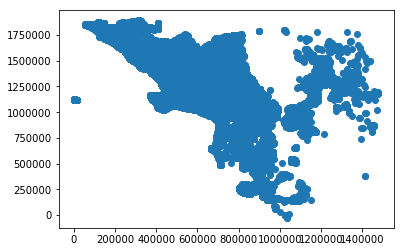

In [47]:
plt.scatter(ll.latitude,ll.longitude)